# Lectura y graficación de una señal almacenada en un archivo txt

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## Abrimos el archivo txt para ver  el contenido

In [50]:
f = open("signal1.txt","r")
raw_data = f.readline()  # con f.read() leemos todo el contenido
f.close()

raw_data

'Fs=400\n'

In [57]:
## Expresion regular para buscar automaticamente el contenido de un numero dentro de un string
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)

['400']


In [56]:
Fs = float(x[0])
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=400.0 hz
 Ts=0.0025 s


## Leemos el archivo excluyendo las 2 primeras filas del archivo

In [39]:
array = np.genfromtxt("./signal1.txt", delimiter=",",skip_header = 2)
array

array([[ 0.        ,  0.        ],
       [ 0.0025    ,  0.30901699],
       [ 0.005     ,  0.58778525],
       ...,
       [ 2.4925    , -0.80901699],
       [ 2.495     , -0.58778525],
       [ 2.4975    , -0.30901699]])

## Ploteamos la lectura

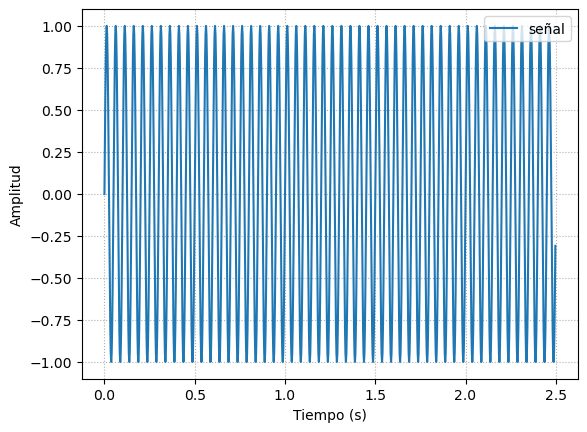

In [40]:
plt.plot(array[:,0], array[:,1], label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.show()

## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia

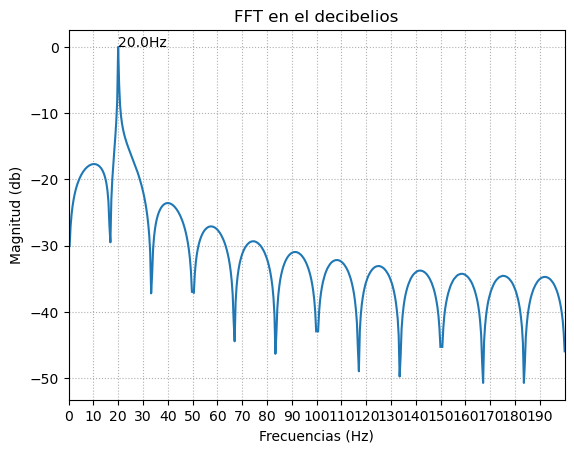

In [58]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = array[:,1]

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()